In [146]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from tqdm import tqdm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [7]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [27]:
init_notebook_mode(connected=True)

In [4]:
csv_path = '/home/roman/data/telecom_churn.csv'
df = pd.read_csv(csv_path)

In [5]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [11]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

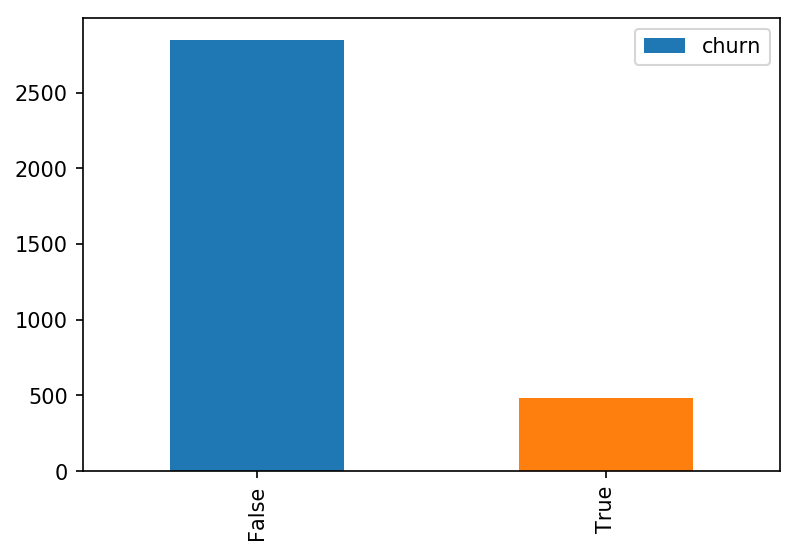

In [15]:
df['churn'].value_counts().plot(kind='bar', legend=True)

In [61]:
y_col = 'churn'

# Distplot 
### (https://plot.ly/python/distplot/)

In [161]:
def distplot_columns(y_col, columns, bin_size=.1):
    if len(columns) > 5:
        raise ValueError('Maximum 5 x-columns is allowed!')
    for c in columns:
        x0 = df[df[y_col] == 0][c]
        x1 = df[df[y_col] == 1][c]
        iplot(ff.create_distplot([x0, x1], [f'Churn 0 by {c}', f'Churn 1 by {c}'], bin_size=bin_size))

In [162]:
columns1 = ['total day minutes', 'total day calls', 
           'total eve minutes', 'total eve calls', 
           'total night minutes']

columns2 = ['total night calls', 'total intl minutes', 
            'total intl calls',  'customer service calls']


In [168]:
pd.crosstab(df['churn'], df['international plan'], normalize=True)

international plan       no       yes
churn                                
False               0.79928  0.055806
True                0.10381  0.041104

In [164]:
distplot_columns(y_col, ['customer service calls'], bin_size=1)

In [64]:
distplot_columns(y_col, columns1)

In [62]:

distplot_columns(y_col, columns2)

# Box 

In [66]:
def box_columns(y_col, columns):
    if len(columns) > 5:
        raise ValueError('Maximum 5 x-columns is allowed!')
    for c in columns:
        x0 = df[df[y_col] == 0][c]
        x1 = df[df[y_col] == 1][c]
        data = [go.Box(y=x0), go.Box(y=x1)]
        iplot(data)

In [67]:
box_columns(y_col, columns1)

In [115]:
def sort_by(by_func, sort_by_col, target_col, q=75):
    """
    q: if by_sort_by_funcfunc is "percentile"
    """
    allowed_by = ['mean', 'median', 'sum', 'percentile']
    gb = df[[target_col, sort_by_col]].groupby(target_col)
    if by_func == 'mean':
        df_tmp = gb.mean()
    elif by_func == 'median':
        df_tmp = gb.median()
    elif by_func == 'sum':
        df_tmp = gb.sum()
    elif by_func == 'percentile':
        df_tmp = gb.agg(np.percentile, q=q)
    else:
        raise ValueError(f'by mast be one of {allowed_by}')
    df_tmp = df_tmp.sort_values(by=sort_by_col, ascending=False)
#     print(df_tmp.head(10))
    return list(df_tmp.index.values)

In [137]:
def box_by_col(y_col, columns, sort_by_func=None, q=75):
    """
    q: if by_sort_by_funcfunc is "percentile"
    """
    if len(columns) > 5:
        raise ValueError('Maximum 5 x-columns is allowed!')
    for c in columns:
        data = []
        if sort_by_func:
            print(f'Sorting by function: {sort_by_func}\n')
            y_col_values = sort_by(sort_by_func, c, y_col, q)
        else:
            print('No sorting strategy was chosen\n')
            y_col_values = df[y_col].unique()
            
#         print(y_col_values)
        for val in y_col_values:
            data.append(
                go.Box(y=df[df[y_col] == val][c], name = str(val))
            )
        print(f'Boxes by {c}')
        iplot(data, show_link = False)

### Порядок вывода не задан

In [132]:
box_by_col('state', columns1)

No sorting strategy was chosen

Boxes by total day minutes


No sorting strategy was chosen

Boxes by total day calls


No sorting strategy was chosen

Boxes by total eve minutes


No sorting strategy was chosen

Boxes by total eve calls


No sorting strategy was chosen

Boxes by total night minutes


### Порядок вывода: по убыванию суммы по целевой колонке

In [112]:
box_by_col('state', columns1, sort_by_func='sum')

Sorting by function: sum

['WV', 'MN', 'AL', 'NY', 'OH', 'WI', 'IN', 'WY', 'MD', 'OR', 'VA', 'KS', 'NJ', 'VT', 'UT', 'MI', 'TX', 'ID', 'CT', 'NC', 'MT', 'WA', 'CO', 'MA', 'NV', 'ND', 'MS', 'ME', 'SD', 'FL', 'AZ', 'OK', 'RI', 'NE', 'MO', 'DE', 'NM', 'KY', 'IL', 'GA', 'SC', 'NH', 'AR', 'HI', 'TN', 'AK', 'DC', 'LA', 'PA', 'IA', 'CA']


Sorting by function: sum

['WV', 'MN', 'NY', 'VA', 'AL', 'WY', 'OH', 'ID', 'IN', 'WI', 'OR', 'MI', 'VT', 'CT', 'TX', 'UT', 'KS', 'NC', 'MD', 'NJ', 'NV', 'WA', 'MA', 'MS', 'RI', 'MT', 'AZ', 'FL', 'NM', 'MO', 'CO', 'ND', 'ME', 'SC', 'OK', 'DE', 'NE', 'KY', 'IL', 'SD', 'AR', 'GA', 'NH', 'HI', 'DC', 'TN', 'LA', 'AK', 'IA', 'PA', 'CA']


Sorting by function: sum

['WV', 'MN', 'NY', 'OH', 'WY', 'VA', 'OR', 'AL', 'WI', 'MI', 'CT', 'VT', 'TX', 'IN', 'ID', 'KS', 'UT', 'MA', 'NC', 'MD', 'RI', 'MT', 'CO', 'NJ', 'WA', 'NV', 'FL', 'NM', 'MS', 'ND', 'DE', 'MO', 'SC', 'ME', 'NE', 'SD', 'AZ', 'OK', 'KY', 'IL', 'TN', 'NH', 'AR', 'GA', 'DC', 'HI', 'LA', 'AK', 'IA', 'PA', 'CA']


Sorting by function: sum

['WV', 'MN', 'NY', 'OH', 'AL', 'WI', 'VA', 'OR', 'WY', 'MI', 'TX', 'CT', 'ID', 'VT', 'KS', 'NC', 'UT', 'NJ', 'IN', 'MD', 'FL', 'MT', 'AZ', 'ND', 'MS', 'ME', 'CO', 'NM', 'MA', 'MO', 'OK', 'NV', 'WA', 'NE', 'RI', 'SC', 'DE', 'SD', 'IL', 'KY', 'GA', 'DC', 'TN', 'AR', 'NH', 'HI', 'AK', 'LA', 'PA', 'IA', 'CA']


Sorting by function: sum

['WV', 'MN', 'NY', 'VA', 'OH', 'OR', 'WI', 'WY', 'CT', 'VT', 'AL', 'IN', 'ID', 'KS', 'MI', 'TX', 'NJ', 'MD', 'NV', 'UT', 'MT', 'NC', 'RI', 'MA', 'WA', 'MO', 'MS', 'NE', 'CO', 'DE', 'AZ', 'NM', 'ND', 'FL', 'ME', 'SD', 'OK', 'SC', 'KY', 'NH', 'IL', 'AR', 'TN', 'DC', 'HI', 'GA', 'LA', 'AK', 'PA', 'IA', 'CA']


### Порядок вывода: по убыванию матожидания по целевой колонке

In [ ]:
box_by_col('state', columns1, sort_by_func='mean')

### Порядок вывода: по убыванию медианы по целевой колонке

In [ ]:
box_by_col('state', columns1, sort_by_func='median')

### Порядок вывода: по убыванию заданного перцентиля по целевой колонке

In [133]:
box_by_col('state', columns1, sort_by_func='percentile', q=75)

Sorting by function: percentile

Boxes by total day minutes


Sorting by function: percentile

Boxes by total day calls


Sorting by function: percentile

Boxes by total eve minutes


Sorting by function: percentile

Boxes by total eve calls


Sorting by function: percentile

Boxes by total night minutes


In [138]:
box_by_col('churn', columns1)

No sorting strategy was chosen

Boxes by total day minutes


No sorting strategy was chosen

Boxes by total day calls


No sorting strategy was chosen

Boxes by total eve minutes


No sorting strategy was chosen

Boxes by total eve calls


No sorting strategy was chosen

Boxes by total night minutes


# Heatmap

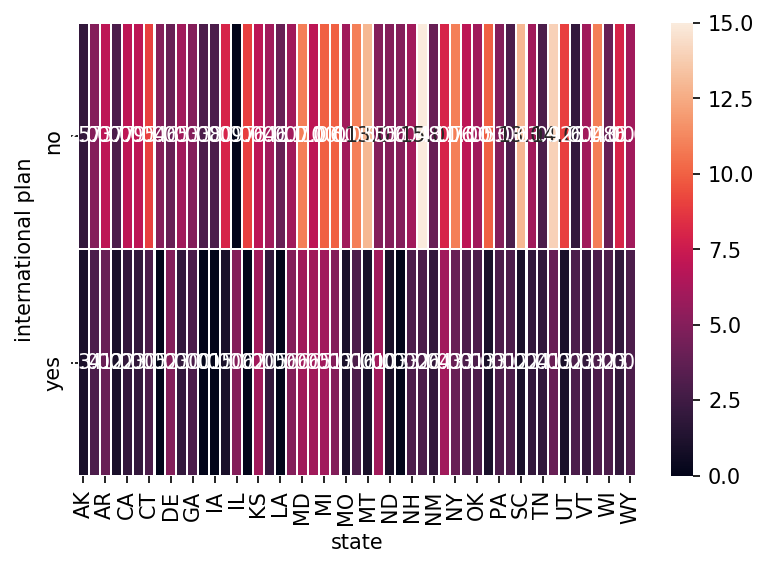

In [143]:
plan_state_calls = df.pivot_table(
                        index='international plan', 
                        columns='state', 
                        values='churn', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(plan_state_calls, annot=True, fmt=".1f", linewidths=.5)

# Отношения персентилей 
#### (х - персентили 50 - 98, у - отношения значений персентилей по колонкам класса 1 к классу 2)

In [153]:
def show_percentiles_relations(columns_to_show, df):
    X = []
    for q in tqdm(range(500, 980)):
        q_val = q / 10
        prcntls = df.groupby('churn')[columns_to_show].agg(np.percentile, q=q_val)
        relations = prcntls.iloc[1].div(prcntls.iloc[0])
        X.append([q_val] + list(relations.values))
    relations_df = pd.DataFrame(data=X, columns=['percentile'] + [f'{c} percentile rel' for c in columns_to_show])
    relations_df.groupby('percentile').sum().plot()
    plt.show()

100%|██████████| 480/480 [00:06<00:00, 74.72it/s]


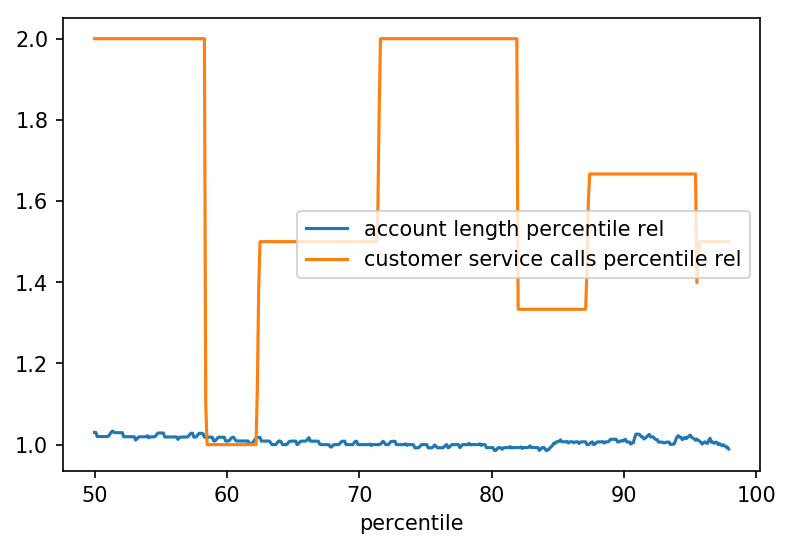

In [155]:
# Видно, насколько отличаются соответствующие персентили для приведённых колонок у разных классов
# columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']
columns_to_show1 = ['account length', 'customer service calls']

show_percentiles_relations(columns_to_show1, df)

In [149]:
# А теперь то же, только для точечной оценки - персентиль 73
prcntls = df.groupby('churn')[columns_to_show].agg(np.percentile, q=73)
prcntls.iloc[1].div(prcntls.iloc[0])

total day minutes      1.261151
total eve minutes      1.072768
total night minutes    1.013621
dtype: float64

In [169]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls    0     1    2    3    4   5   6  7  8  9   All
churn                                                                  
False                   605  1059  672  385   90  26   8  4  1  0  2850
True                     92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

/home/roman/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



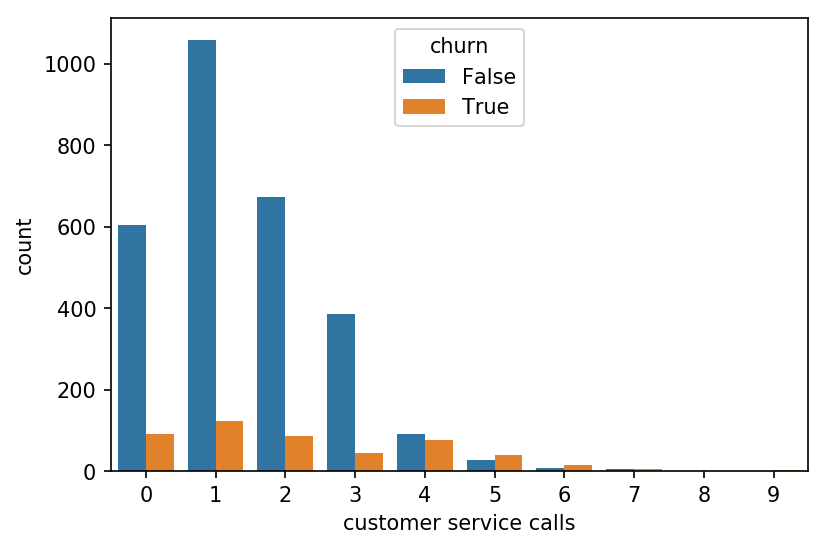

In [171]:
# А нагляднее всего по обращениям в сервисный центр так
sns.countplot(x='customer service calls', hue='churn', data=df);